# EDMDDL Tests on Duffing Oscillator

In [1]:

import PKoopmanDL as pkdl
import numpy as np
import matplotlib.pyplot as plt
import torch

config_file = "EDMDDL.json"
tmp_func = lambda x: x
observable_func = pkdl.ObservableFunction(tmp_func, 2)
solver = pkdl.EDMDDLSolverWrapper(config_file)
solver.setup(observable_func)
K = solver.solve()
koopman_dynamics = pkdl.KoopmanDynamics(K, solver.dictionary, [0,1], 2)

2024-11-28 19:01:27,229 PKoopmanDL: [INFO] [EDMDDLSolver] Solving...
Training: 100%|██████████| 100/100 [01:38<00:00,  1.01it/s, train_loss=2.76e-03, val_loss=1.77e-03]


## Plot

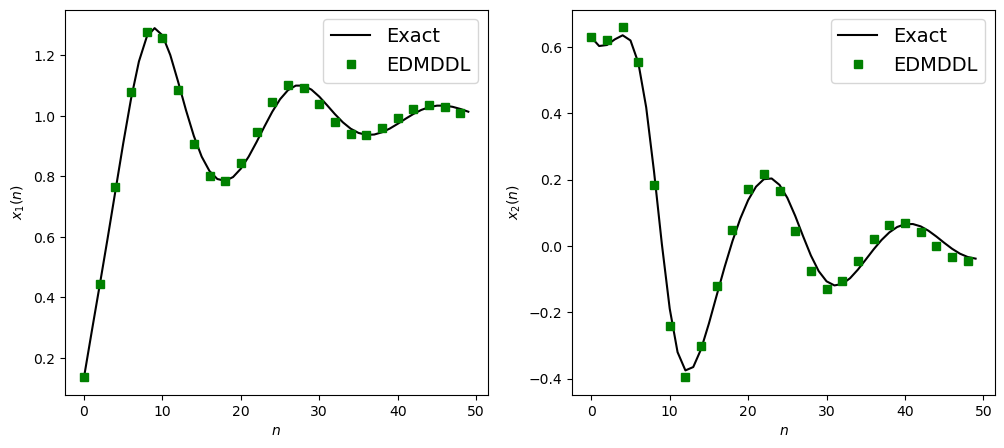

In [2]:

# predict
predict_seed = 109
dataset_predict = pkdl.KoopmanDataSet(solver.dynamics)
dataset_predict.generate_data(1, solver.traj_len, solver.x_min, solver.x_max, solver.param, predict_seed)
x0 = torch.unsqueeze(dataset_predict.data_x[0], dim=0)
p = koopman_dynamics.traj(x0, None, solver.traj_len)
t_grid = np.arange(0, solver.traj_len)
x_est_traj = p[0, :, :].detach().numpy()
x_traj = solver.dynamics.traj(x0, solver.param, solver.traj_len)[0, :, :].detach()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12,5))  
ax1.plot(t_grid, x_traj[:,0], 'k-', label='Exact', markevery=2)
ax1.plot(t_grid, x_est_traj[:,0], 'gs', label='EDMDDL', markevery=2)

ax2.plot(t_grid, x_traj[:,1], 'k-', label='Exact', markevery=2)
ax2.plot(t_grid, x_est_traj[:,1], 'gs', label='EDMDDL', markevery=2)


ax1.set_xlabel(r"$n$")
ax1.set_ylabel(r"$x_{1}(n)$")
ax1.legend(loc='best',prop={'size':14})

ax2.set_xlabel(r"$n$")
ax2.set_ylabel(r"$x_{2}(n)$")
ax2.legend(loc='best',prop={'size':14})